# Ford GoBike Exploration

## Giulio Tommasino

## Preliminary Wrangling

This data set is taken from https://www.fordgobike.com/system-data and represents trips taken by members of the service for month of February of 2019.
Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.
It' s one file(csv) and 16 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.shape

(183412, 16)

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

The dataset has:

-Duration of the rent for each bike

-Start and end time

-An ID to identify the station (both start and end)

-Name of  the station ( start and end)

-Latitude and longitude of the station ( start and end)

-An ID to identify each bike

-Whether the user has subscription or not

-The gender of the user

-Year of birth of the user

-The gender of the user

There are 183412 rows and 16 columns
### What is/are the main feature(s) of interest in your dataset?

I'm interested in figuring out how genders uses the sevice (lenght of the ride, distance covered, their age), and the difference between subscribers and costumers use the service.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think subscribers will have much more travels and duration than costumers, since they have signed up for the service


# Cleaning data:




###  Make a copy of the dataset:

In [6]:
df1 = df.copy()

**Define:** Drop columns without gender and birth year:




**Code**:

In [7]:
df1.dropna(subset = ['member_gender', 'member_birth_year'], inplace = True)

**Test**:

In [8]:
df1.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

**Define:** Drop columns with no start_station_id, start_station_name, end_station_id, end_station_name


**Code:**

In [9]:
df1.dropna(subset = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], inplace = True)

**Test:**

In [10]:
df1.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

**Define:** Create a column for the age

In [11]:
df1['age'] = 2019 - df1['member_birth_year'].astype(int)

In [12]:
df1.age.max()

141

In [13]:
df1.age.min()

18

Since 141 year is not reasonable, I will drop the rows with unreasonable age (>85)



**Code:**

In [14]:
df1.drop(df1[df1.age > 85].index, inplace = True)

**Test**

In [15]:
df1.age.max()

85

**Define:** Drop year of birth column


**Code:**

In [16]:
df1.drop(['member_birth_year'],axis = 1, inplace=True)

**Test**

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174765 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174765 non-null  int64  
 1   start_time               174765 non-null  object 
 2   end_time                 174765 non-null  object 
 3   start_station_id         174765 non-null  float64
 4   start_station_name       174765 non-null  object 
 5   start_station_latitude   174765 non-null  float64
 6   start_station_longitude  174765 non-null  float64
 7   end_station_id           174765 non-null  float64
 8   end_station_name         174765 non-null  object 
 9   end_station_latitude     174765 non-null  float64
 10  end_station_longitude    174765 non-null  float64
 11  bike_id                  174765 non-null  int64  
 12  user_type                174765 non-null  object 
 13  member_gender            174765 non-null  object 
 14  bike

**Define:** Create a distance column

In [18]:
import math

#Create a function to calculate the distance in km between start and end station

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d




In [19]:
df1['distance'] = df1.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

**Test:**

In [20]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35,0.361191
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47,2.641372
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30,0.266543
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,2.647945
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,2.322918


**Define:** Drop longitude and latitude columns

    
    
    
**Code:**

In [21]:
df1.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],axis = 1, inplace = True)

**Test**

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174765 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174765 non-null  int64  
 1   start_time               174765 non-null  object 
 2   end_time                 174765 non-null  object 
 3   start_station_id         174765 non-null  float64
 4   start_station_name       174765 non-null  object 
 5   end_station_id           174765 non-null  float64
 6   end_station_name         174765 non-null  object 
 7   bike_id                  174765 non-null  int64  
 8   user_type                174765 non-null  object 
 9   member_gender            174765 non-null  object 
 10  bike_share_for_all_trip  174765 non-null  object 
 11  age                      174765 non-null  int32  
 12  distance                 174765 non-null  float64
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 

**Define:** Change the duration time in minutes
    
    
**Code:**

In [23]:
#I have made an integer division
df1['duration'] = df1['duration_sec'] // 60


**Test:**

In [24]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance,duration
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,35,0.361191,869
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47,2.641372,1030
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,30,0.266543,608
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,2.647945,26
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,60,2.322918,29


**Define:** Drop duration_sec column


**Code:**

In [25]:
df1.drop(['duration_sec'],axis=1, inplace = True)

**Test:**

In [26]:
list(df1)

['start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip',
 'age',
 'distance',
 'duration']

**Define:** Change data types of start_time, end_time to datetime


**Code**

In [27]:
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])

**Test**

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174765 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174765 non-null  datetime64[ns]
 1   end_time                 174765 non-null  datetime64[ns]
 2   start_station_id         174765 non-null  float64       
 3   start_station_name       174765 non-null  object        
 4   end_station_id           174765 non-null  float64       
 5   end_station_name         174765 non-null  object        
 6   bike_id                  174765 non-null  int64         
 7   user_type                174765 non-null  object        
 8   member_gender            174765 non-null  object        
 9   bike_share_for_all_trip  174765 non-null  object        
 10  age                      174765 non-null  int32         
 11  distance                 174765 non-null  float64       
 12  duration        

**Define:** Ectract days of the week from start_time and weekday 



**Code:**

In [29]:
df1['day']=df1['start_time'].dt.day

df1['start_time_weekday']=df1['start_time'].dt.strftime('%a')

**Test**

In [30]:
df1.head(1)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance,duration,day,start_time_weekday
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,35,0.361191,869,28,Thu


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**The plot shows that the most used stations are Market st at 10th St and San Francisco Caltrain Station 2 respectively for start and end station, accordingly the most common trip is from Market st at 10th St to San Francisco Caltrain Station 2.**

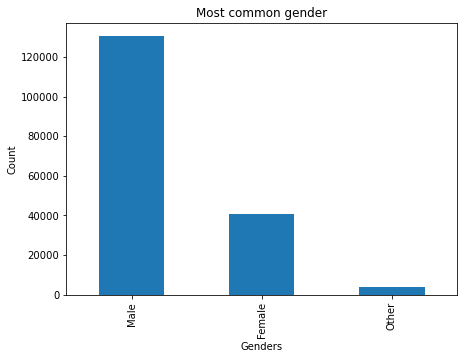

In [31]:
genders = df.member_gender.value_counts()
genders.plot(kind='bar', figsize = (7,5), title = 'Most common gender')
plt.xlabel('Genders')
plt.ylabel('Count');

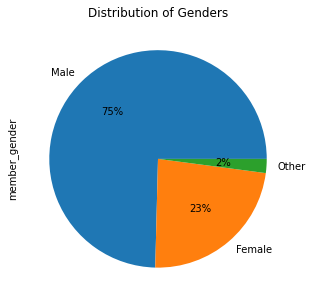

In [32]:
genders.plot(kind='pie', figsize = (7,5),autopct ='%1.0f%%', title = 'Distribution of Genders');


**It is clear that males are the most common users of ford go bike are males.
They are the 75% of the total, with female at the 23% and other genders are the 2% of the total**

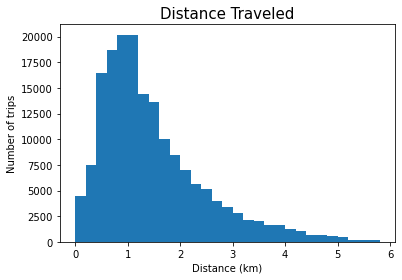

In [33]:
plt.hist(data = df1, x = 'distance', bins = np.arange(0,6,0.2))

plt.title('Distance Traveled', fontsize = 15)
plt.xlabel('Distance (km)')
plt.ylabel('Number of trips');


In [34]:
df1.distance.describe()

count    174765.000000
mean          1.479390
std           1.038273
min           0.000000
25%           0.770978
50%           1.199211
75%           1.939512
max          63.800190
Name: distance, dtype: float64

**The distance travel chart shows that short trips are the most common: The mean length of a ride is 1.48km** 

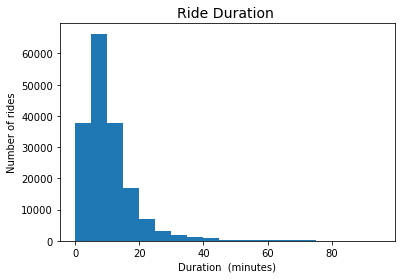

In [35]:
plt.hist(data = df1, x = 'duration', bins = np.arange(0, 100, 5))

plt.title("Ride Duration ",  fontsize=14)
plt.xlabel('Duration  (minutes)')
plt.ylabel('Number of rides');

In [36]:
df1.duration.describe()

count    174765.000000
mean         11.246434
std          27.384685
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration, dtype: float64

**This chart shows that most of the rides are less than 20 minutes long, with an average of 11 minutes**

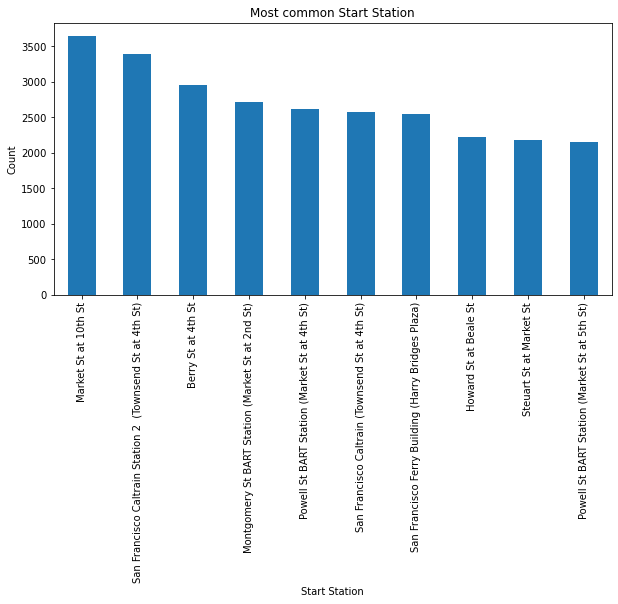

In [37]:
common_start = df1.start_station_name.value_counts()[0:10]
common_start.plot(kind='bar', figsize = (10,5), title = 'Most common Start Station')
plt.xlabel('Start Station')
plt.ylabel('Count');


**The most common start stations are Market St at 10th St, San Francisco Caltrain Station 2  (Townsend St at 4th St) and Berry St at 4th St.**                                          

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I had to clean the dataset before doing some analysis: Change some data types such as time, age  and duration. I included a function to find the distance between start and end station.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Some of the data were inconsistent (age > 85 years) which i didn't consider.
I removed some data from the dataset whic didn't have birth year, gender or start and end station. finally I dropped the columns don't needed for analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

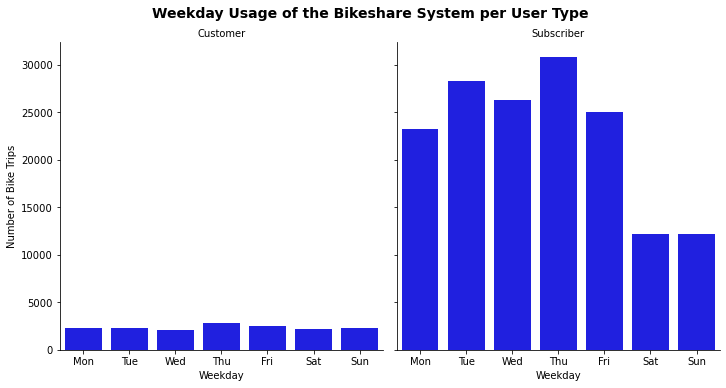

In [38]:
g = sb.catplot(data=df1, x='start_time_weekday', col="user_type", kind='count', order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], color = 'blue')
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold');

**This graph shows that the subscribers use the service more often on Monday through Friday, for the customer there is not this difference, since each day has approximatly the same number of trips.
It is clear to see that the subscribers use the service a lot more than customer.**

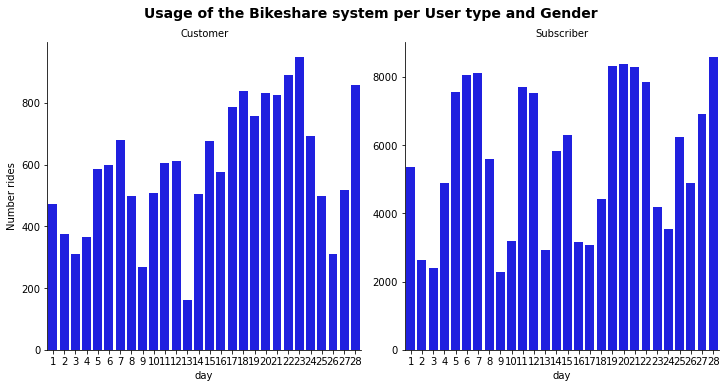

In [39]:
g = sb.catplot(data=df1, x='day', col="user_type", kind='count',color = 'blue', sharey = False)
g.set_axis_labels("day", "Number rides")
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare system per User type and Gender', y=1.03, fontsize=14, fontweight='semibold');

**The plot shows that for costumers the period between 15-23 was the one with the more usage of the service, while for subscribers there isn't such period, instead there is a periodicity of 5 days every 7 days.
This is in accordance of the previous chart.**

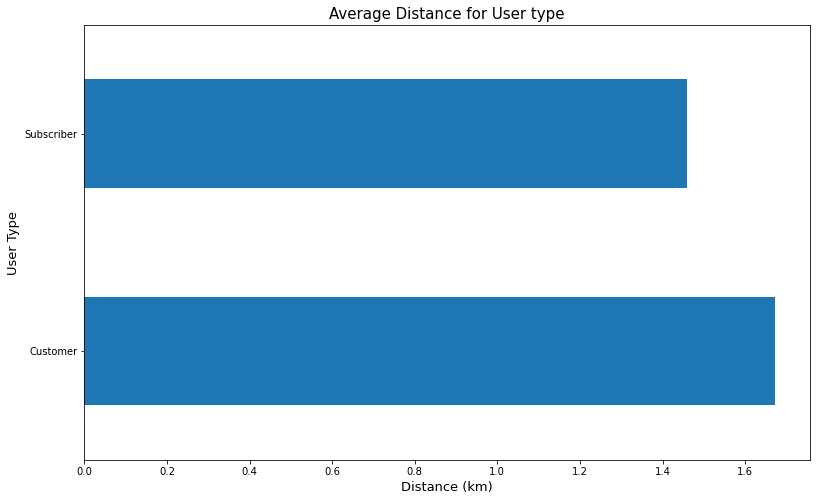

In [40]:
h = df1.groupby('user_type')['distance'].mean().plot(kind='barh', figsize=(13,8))
plt.xlabel('Distance (km)', fontsize = 13)
plt.ylabel('User Type', fontsize = 13)
plt.title('Average Distance for User type', fontsize = 15);

In [41]:
df1.groupby('user_type')['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,16559.0,1.672839,1.145858,0.0,0.894391,1.404102,2.237489,17.106286
Subscriber,158206.0,1.459142,1.024254,0.0,0.761726,1.180036,1.895442,63.800190


**The chart shows that on average costumers take longer rides than subscribers.
The mean distance for subscribers is 1.46 km , and the mean for costumers is 1.67 km.**

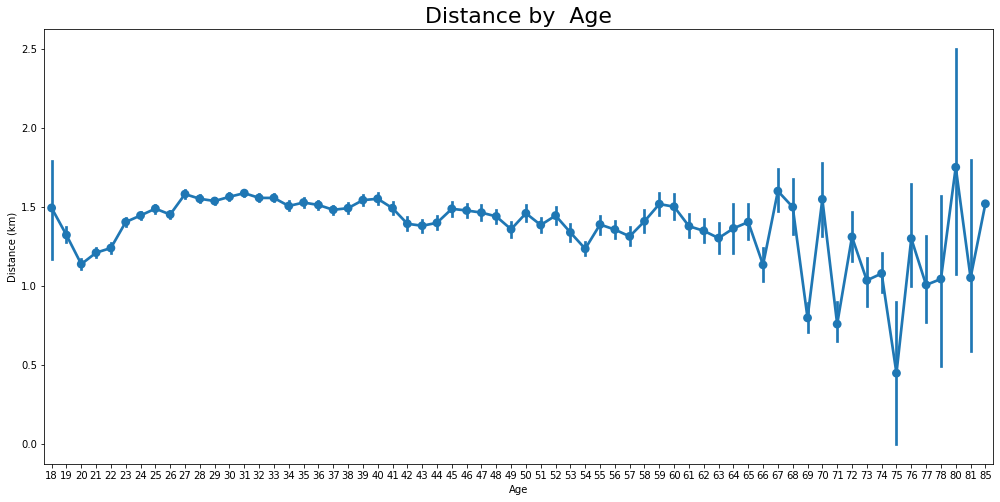

In [42]:
plt.figure(figsize=(17,8))
sb.pointplot(x='age', y='distance', data=df1)
plt.title('Distance by  Age', fontsize=22)
plt.xlabel('Age')
plt.ylabel('Distance (km)');



**This line plot shows that oldest riders have the greater fluctuation between the shortest and longest rides**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I was interesting to observe the different usage behaviors between subscribers and customers. Subscribers tend to use the service more dureng Monday to Friday, whilefor the customer there is not this difference.  It was surprising to see that customers on average, take longer rides than subscribers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The last line graph shows that oldest riders have the greater fluctuation between the shortest and longest rides.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

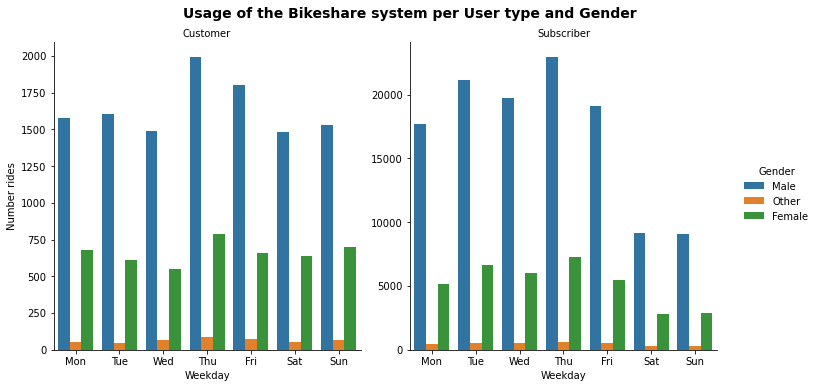

In [43]:

g = sb.catplot(data=df1, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False, order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
g.set_axis_labels("Weekday", "Number rides")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare system per User type and Gender', y=1.03, fontsize=14, fontweight='semibold');

**This chart shows how each gender follow a similar pattern .**


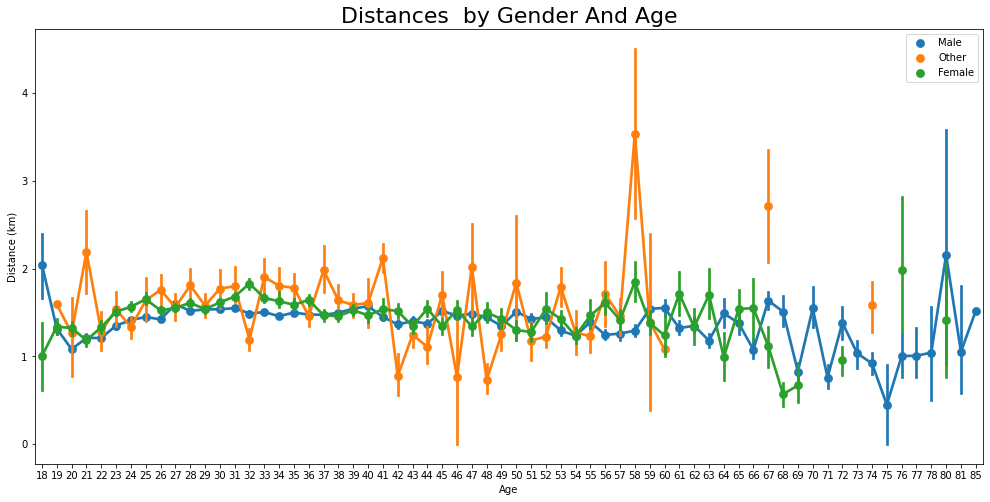

In [44]:
plt.figure(figsize=(17,8))
sb.pointplot(x='age', y='distance', hue='member_gender', data=df1)
plt.title('Distances  by Gender And Age', fontsize=22)
plt.xlabel('Age')
plt.ylabel('Distance (km)')
plt.legend();



**The Other gender has the greater fluctuation, especially between 45-60 years, and we have very poor data for the Other Gender  over 60 years old**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate charts reinforced the earlier relationships that were observed. T subscribers use the service on Monday-Friday, while costumers doesn't follow a similar pattern. Genders does not influence this trend.  

### Were there any interesting or surprising interactions between features?

It was surprising to note that the "other gender" category had the most outliers in the data.